# Project: Investigate a Dataset - [FBI NCIS Firearm Background Check Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

### Dataset Description and Analysis Questions

The first dataset used in this project represents firearm background checks run by the FBI's NCIS system between November 1998 and September 2023. These checks ensure that an individual is eligible to purchase firearms or explosives. In the last decade alone, over 100 million checks have been run; however, as is the case in our data as well, this does not equate to 100 million licensed firearms distributed as a result. 

Here is a variable breakdown, as per fbi.gov:
- permit: background checks run for the purpose of issuing a permit
- permit_recheck: checks run for the purpose of rechecking a previously issued permit
- handgun: checks attached to a short-stock, single-hand firearm
- long_gun: checks attached to a firearm intended to be fired from the shoulder
- prepawn: standard checks run before pawning a firearm at a licensed shop
- redemption: checks run upon the return of a firearm to a licensed shop
- returned: checks run to clear the return of a firearm from law enforcement to its owner
- rentals: checks run for rented or loaned firearms
- private: checks run before purchasing a firearm from a non-licensed dealer
- return_to_seller: checks run upon the return of a firearm to a non-licensed dealer

The second dataset represents U.S. census data from 2016. For our purposes, we will use the variables:
- State
- Foreign born persons, percent, 2011-2015
- Population estimates, July 1, 2016,  (V2016)

The State column will be used to join our two tables.

Our first research question aims to investigate how background checks associated with licensed vs. unlicensed dealers have varied relative to one another since 2020. Our second research questions consults the census data to determine the relationship between foreign-born citizens and background checks run per capita. Before we investigate, however, the data must be inspected and prepared for analysis. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df1 = pd.read_csv('Database_Ncis_and_Census_data/gun_data_updated.csv')
df2 = pd.read_csv('Database_Ncis_and_Census_data/us_census_data_updated.csv')
df1.shape

(16445, 27)

The data consists of 16445 rows and 27 columns. Here are the first five rows with all columns:

In [3]:
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342.0,145.0,15421.0,12848.0,1156.0,1052,0.0,14.0,2.0,1.0,2451.0,1001.0,18.0,40.0,0.0,0.0,0.0,0.0,29.0,21.0,14.0,0.0,1.0,0.0,44556
1,2023-09,Alaska,188.0,10.0,2429.0,2543.0,262.0,197,0.0,0.0,0.0,0.0,160.0,87.0,1.0,29.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5922
2,2023-09,Arizona,9113.0,2014.0,14398.0,8239.0,1575.0,931,0.0,14.0,1.0,2.0,1254.0,404.0,8.0,214.0,9.0,0.0,0.0,0.0,6.0,6.0,0.0,1.0,0.0,0.0,38189
3,2023-09,Arkansas,2139.0,181.0,5645.0,6108.0,437.0,466,6.0,8.0,5.0,1.0,1237.0,949.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,13.0,2.0,0.0,0.0,0.0,17207
4,2023-09,California,28611.0,15559.0,33792.0,20548.0,4295.0,0,0.0,1.0,1.0,0.0,871.0,445.0,31.0,2185.0,1283.0,56.0,0.0,0.0,7289.0,3093.0,529.0,26.0,10.0,0.0,118625


The data consists primarily of numerical variables, with the exception of 'state.' Let's investigate further.

In [4]:
df1.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

This confirms most of our data is stored as an integer or float, but month is stored as a string and will need to be converted to a datetime object. It may also be wise to convert all floats to integers, since it is impossible to have a fractional background check.

Let's check on missing values:

In [5]:
df1.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

Many of the columns have null values represented by zeroes. Because our research questions focus on more recent data, which have far less null values than older data, we'll ignore these values rather than impute or remove them.

There may also be duplicates in our data:

In [6]:
df1.duplicated().sum()

0

No duplicates found. 

Lastly, our column labels are clearly formatted and intuitive, so there is no cleaning to be done there. 

Before cleaning this dataset, let's follow the same approach with our 2nd dataset.

In [7]:
df2.shape

(85, 52)

The data consists of 85 rows and 52 columns. Here are the first five rows with all columns:

In [8]:
df2.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


For ease of viewing, we'll transpose this dataset so that each state is an observation rather than a feature.

In [9]:
df2.set_index('Fact', inplace=True)
df2 = df2.T
df2.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(a),(a),(a),(a),(a),NaN,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(c),(c),(c),(c),(c),(c),NaN,NaN,NaN,NaN,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Includes data not distributed by county.,NaN,NaN,Includes persons reporting only one race,"Hispanics may be of any race, so also are incl...",Economic Census - Puerto Rico data are not com...

And remove the Fact Note row and the last twenty columns:

In [10]:
df2.drop(index="Fact Note", inplace=True)
df2.drop(df2.columns[-20:], axis=1, inplace=True)
df2.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,146","1,503"

Let's also make the state column an actual column rather than an index:

In [11]:
df2.index.name = 'State'
df2.reset_index(inplace=True)
df2.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,14

The remaining cleaning will be performed later. First, let's trim the data down to the variables we need and investigate their data types.

In [12]:
df2_q2 = df2.loc[:, ['State', 'Foreign born persons, percent, 2011-2015', 
                     'Population estimates, July 1, 2016,  (V2016)']]
df2_q2.dtypes

Fact
State                                           object
Foreign born persons, percent, 2011-2015        object
Population estimates, July 1, 2016,  (V2016)    object
dtype: object

Our three variables are strings. We will need to convert the foreign-born percentage and population estimates into numeric values in order to run calculations on them.

Next, missing values:

In [13]:
df2_q2.isnull().sum()

Fact
State                                           0
Foreign born persons, percent, 2011-2015        0
Population estimates, July 1, 2016,  (V2016)    0
dtype: int64

And duplicates:

In [14]:
df2_q2.duplicated().sum()

0

With this, we're ready to perform our remaining data cleaning operations.


### Data Cleaning

For our NCIS data, we need to convert the 'month' column to a datetime object and convert all numeric data into integers.

In [15]:
df1['month'] = pd.to_datetime(df1['month'], format='%Y-%m')

num_cols = df1.select_dtypes(include='float').columns
df1[num_cols] = df1[num_cols].fillna(0).astype(int)
df1.dtypes

month                        datetime64[ns]
state                                object
permit                                int64
permit_recheck                        int64
handgun                               int64
long_gun                              int64
other                                 int64
multiple                              int64
admin                                 int64
prepawn_handgun                       int64
prepawn_long_gun                      int64
prepawn_other                         int64
redemption_handgun                    int64
redemption_long_gun                   int64
redemption_other                      int64
returned_handgun                      int64
returned_long_gun                     int64
returned_other                        int64
rentals_handgun                       int64
rentals_long_gun                      int64
private_sale_handgun                  int64
private_sale_long_gun                 int64
private_sale_other              

Similarly, we need to recode our foreign-born percentage variable in our census data.

In [16]:
df2_q2['Foreign born persons, percent, 2011-2015'].values

array(['3.50%', '7.40%', '13.50%', '4.70%', '27.00%', '9.80%', '13.90%',
       '8.70%', '19.70%', '9.80%', '17.70%', '6.10%', '14.00%', '4.80%',
       '4.70%', '6.90%', '3.40%', '4.00%', '3.50%', '14.50%', '15.50%',
       '6.30%', '7.70%', '2.30%', '3.90%', '2.10%', '6.60%', '19.20%',
       '5.70%', '21.70%', '0.098', '0.225', '0.077', '0.032', '0.041',
       '0.058', '0.099', '0.063', '0.133', '0.048', '0.03', '0.048',
       '16.60%', '8.40%', '4.30%', '11.70%', '13.40%', '1.50%', '4.80%',
       '3.60%'], dtype=object)

The values are a mix of percentages and proportions. Let's standardize to all percentages:

In [17]:
col = 'Foreign born persons, percent, 2011-2015'

perc_mask = df2_q2[col].str.contains('%')
perc_mask.value_counts()

True     38
False    12
Name: Foreign born persons, percent, 2011-2015, dtype: int64

In [18]:
df2_q2.loc[~perc_mask, col] = df2_q2.loc[~perc_mask, col].astype(float)*100
df2_q2.loc[perc_mask, col] = df2_q2.loc[perc_mask, col].str.replace('%', '').str.replace(',', '').astype(float)
df2_q2[col].values

array([3.5, 7.4, 13.5, 4.7, 27.0, 9.8, 13.9, 8.7, 19.7, 9.8, 17.7, 6.1,
       14.0, 4.8, 4.7, 6.9, 3.4, 4.0, 3.5, 14.5, 15.5, 6.3, 7.7, 2.3, 3.9,
       2.1, 6.6, 19.2, 5.7, 21.7, 9.8, 22.5, 7.7, 3.2, 4.1000000000000005,
       5.800000000000001, 9.9, 6.3, 13.3, 4.8, 3.0, 4.8, 16.6, 8.4, 4.3,
       11.7, 13.4, 1.5, 4.8, 3.6], dtype=object)

All the values are now on an equivalent scale. Lastly, our population estimate column: 

In [19]:
df2_q2['Population estimates, July 1, 2016,  (V2016)'] = \
df2_q2['Population estimates, July 1, 2016,  (V2016)'].str.replace(',', '').astype(int)
df2_q2.head()

Fact,State,"Foreign born persons, percent, 2011-2015","Population estimates, July 1, 2016, (V2016)"
0,Alabama,3.5,4863300
1,Alaska,7.4,741894
2,Arizona,13.5,6931071
3,Arkansas,4.7,2988248
4,California,27.0,39250017


Let's also join this dataframe with our first dataframe and remove unnecessary columns. Each row will join data from 2023-09-01 in each state. 

In [20]:
df2_q2_joined = pd.merge(df2_q2, df1, how="left", left_on="State", right_on="state").query( \
     'month == "2023-09-01"').loc[:, ['State', 'Foreign born persons, percent, 2011-2015', 'totals', 
                                     'Population estimates, July 1, 2016,  (V2016)']]
df2_q2_joined.head()

,State,"Foreign born persons, percent, 2011-2015",totals,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,3.5,44556,4863300
299,Alaska,7.4,5922,741894
598,Arizona,13.5,38189,6931071
897,Arkansas,4.7,17207,2988248
1196,California,27.0,118625,39250017


With our combined total background check and population estimates columns, we can compute a per capita check statistic to correlate against our foreign-born percentage:

In [21]:
df2_q2_joined['Per Capita Total Checks'] = df2_q2_joined['totals'] / \
df2_q2_joined['Population estimates, July 1, 2016,  (V2016)']
df2_q2_joined.drop(['Population estimates, July 1, 2016,  (V2016)'], axis=1, 
                  inplace=True)
df2_q2_joined.head()

,State,"Foreign born persons, percent, 2011-2015",totals,Per Capita Total Checks
0,Alabama,3.5,44556,0.009162
299,Alaska,7.4,5922,0.007982
598,Arizona,13.5,38189,0.005510
897,Arkansas,4.7,17207,0.005758
1196,California,27.0,118625,0.003022


<a id='eda'></a>
## Exploratory Data Analysis


### How has the ratio of background checks associated with a licensed shop (pre-pawn and redemption) to checks associated with an unlicensed dealer (private-sale) changed between 2020 and 2023?

Let's first create a ratio variable for each row. Let's also remove rows that represent Guam, Puerto Rico, the Mariana Islands, and the Virgin Islands to avoid outliers and maintain relevance.

In [22]:
df1['ratio'] = (df1['prepawn_handgun'] + df1['prepawn_long_gun'] + df1['prepawn_other'] + df1['redemption_handgun'] + df1['redemption_long_gun'] + df1['redemption_other']) / (df1['private_sale_handgun'] + df1['private_sale_long_gun'] + df1['private_sale_other'])
df1_q1 = df1.query('state not in ["Guam", "Puerto Rico", "Mariana Islands", "Virgin Islands"]')
df1_q1.iloc[:51, [0, 1, -1]].head()

,month,state,ratio
0,2023-09-01,Alabama,54.484375
1,2023-09-01,Alaska,248.000000
2,2023-09-01,Arizona,140.250000
3,2023-09-01,Arkansas,104.952381
4,2023-09-01,California,0.123637


Even across just five states, the ratios seem to vary drastically. This is likely due to different firearm regulations and variations in popular sentiment towards firearms across the United States. Before answering our research question directly, let's view a histogram of these ratio values. We'll also filter out values equal to 0 and inf:

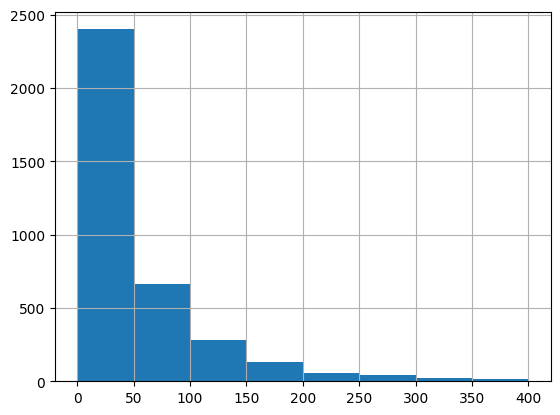

In [23]:
df1_q1_inf_0 = df1_q1[(df1_q1['ratio'] != 0) & (np.isfinite(df1_q1['ratio']))]
bins = np.arange(0, 450, 50)
df1_q1_inf_0['ratio'].hist(bins=bins, range=(0, 500));

Our histogram shows the majority of ratios lie within 0 and 50. This means it is common for there to be 1-50x as many background checks associated with licensed shops as there are with unlicensed dealers.

Let's now calculate the average ratios in the United States for each month and year. We have 50 states plus the District of Columbia, which amount to 51 rows per month and year. 

In [24]:
avg_ratios = df1_q1_inf_0.groupby(df1_q1_inf_0.index // 51)['ratio'].mean().tolist()

Because the range January 2020 to September 2023 covers 45 months, we'll extract the first 45 values and reverse them.

In [25]:
avg_ratios_sorted = avg_ratios[:45]
avg_ratios_sorted.reverse()
avg_ratios_sorted[:5]

[47.49756110366617,
 34.3036878046423,
 25.06737238015517,
 22.10654415319767,
 23.067649419883416]

Let's now extract the month and year combinations in order to construct a line graph.

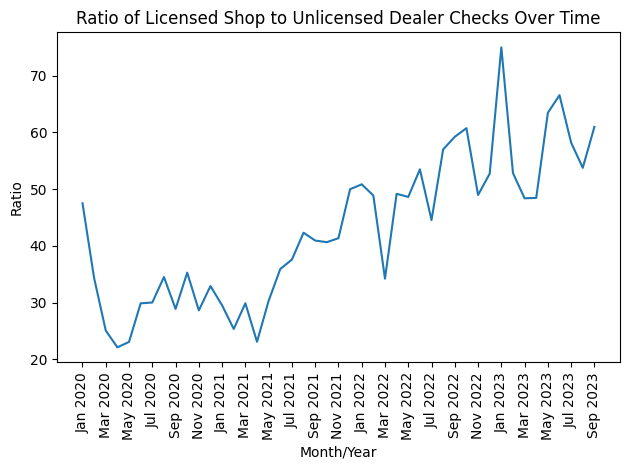

In [26]:
df1_q1 = df1_q1.copy() 
df1_q1['month_graph'] = df1_q1['month'].dt.strftime('%b %Y')
x_labs = df1_q1['month_graph'].unique()[:45][::-1]
plt.plot(x_labs, avg_ratios_sorted)
plt.xlabel('Month/Year')
plt.ylabel('Ratio')
plt.title('Ratio of Licensed Shop to Unlicensed Dealer Checks Over Time')
plt.xticks(ticks=range(0, len(x_labs), 2), labels=x_labs[::2], rotation=90, ha='center')
plt.tight_layout()  
plt.show()

Other than an initial downward slope, the line trends upwards across the past three years, suggesting that prospective gun owners are resorting more to licensed avenues rather than unlicensed avenues. The trend isn't wholly constant, however; various downward and upward spikes represent short-term fluctations in the ratio. Further analysis will be included in the Conclusions section.

### What is the correlation between the percentage of foreign-born citizens and the total number of background checks run within a state?

Let's first investigate histograms of our three relevant variables by utilizing a custom function.

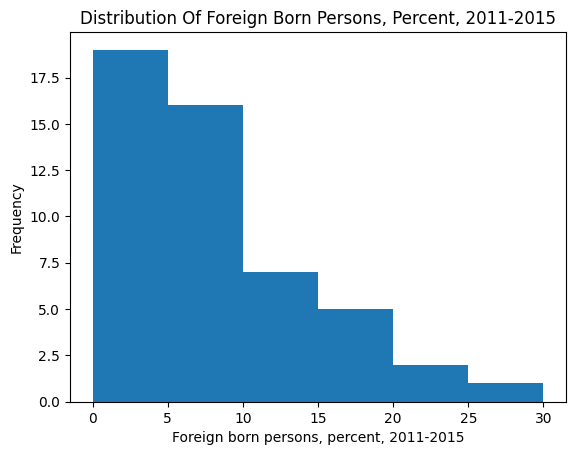

In [27]:
def hist_chart(x, bins):  
    '''Plots histogram based on specified variable and number of bins.'''
    plt.hist(x, bins=bins)
    plt.xlabel(x.name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {x.name}'.title())
    
hist_chart(df2_q2_joined['Foreign born persons, percent, 2011-2015'], np.arange(0, 35, 5))

Most states have a foreign-born population between 0% and 10%, with one state (California) having 27%.

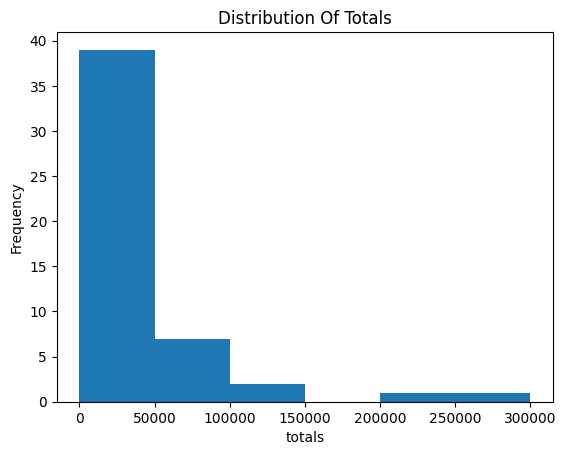

In [28]:
hist_chart(df2_q2_joined['totals'], np.arange(0, 350000, 50000));

The vast majority of states run between 0 and 50000 background checks on a monthly basis. Kentucky and Illinois represent our two outliers, with total background checks in the 200000-300000 range.

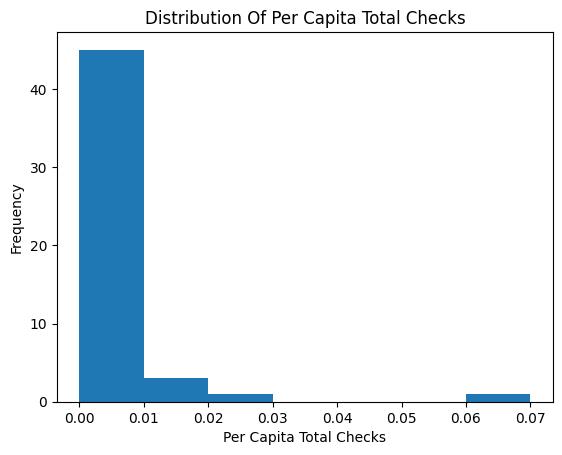

In [29]:
hist_chart(df2_q2_joined['Per Capita Total Checks'], np.arange(0, 0.08, 0.01))

In addition, the vast majority of states run between 0.00 and 0.01 background checks per person living in each respective state. Our one outlier is Kentucky.

Lastly, before calculating our correlation, let's observe a scatterplot of our two variables:

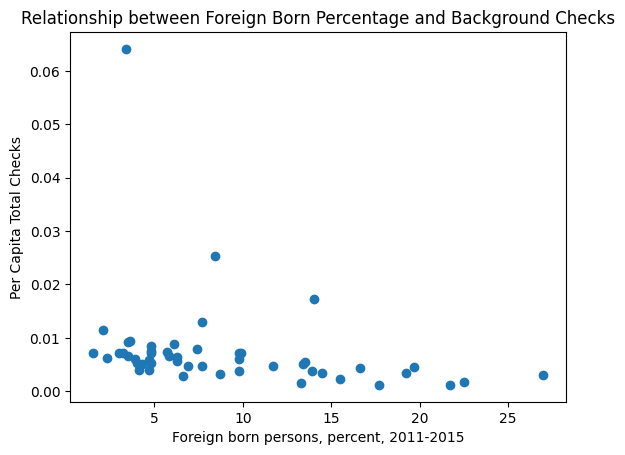

In [30]:
plt.scatter(df2_q2_joined['Foreign born persons, percent, 2011-2015'], 
            df2_q2_joined['Per Capita Total Checks'])
plt.title("Relationship between Foreign Born Percentage and Background Checks")
plt.xlabel("Foreign born persons, percent, 2011-2015")
plt.ylabel("Per Capita Total Checks")
plt.show()

From our visualization, it's difficult to describe the correlation, as the rate of per capita total checks is fairly consistent regardless of the percentage of foreign-born persons, outside of our outlier (Kentucky). However, there may be a subtle decreasing trend across the x-axis. We may can confirm this by calculating the correlation coefficient:

In [31]:
print(df2_q2_joined[['Foreign born persons, percent, 2011-2015', 'Per Capita Total Checks']].dtypes)


Foreign born persons, percent, 2011-2015     object
Per Capita Total Checks                     float64
dtype: object


In [32]:
df2_q2_joined['Foreign born persons, percent, 2011-2015'] = \
pd.to_numeric(df2_q2_joined['Foreign born persons, percent, 2011-2015'], errors='coerce')
df2_q2_joined['Foreign born persons, percent, 2011-2015'].corr(df2_q2_joined['Per Capita Total Checks'])

-0.2673156294050484

As predicted, we have a weak negative correlation. Our r-value of ~-0.27 is indicative of a potential inverse relationship between foreign-born persons and total background checks. However, with only 51 data points, we cannot extrapolate much from this statistic. 

<a id='conclusions'></a>
## Conclusions

After verifying the state of missing/duplicate values, optimizing data types, and formatting and joining our datasets appropriately, we investigated our first research question by analyzing the relationship between background checks associated with licensed and unlicensed dealers over time. We observed a significant trend in the ratio between licensed and unlicensed checks. This may be in response to increased background check legislation that makes it more difficult to purchase a firearm through unlicensed channels. It may also have to do with supply chain alterations during the COVID-19 pandemic or trends in disposable income levels that sway gun owners toward one type of dealer over another. Lastly, there may be changes in public sentiment related to safety concerns surrounding unlicensed dealers. One limitation here is that we lost some ratio data due to missing values in certain columns. Future research should experiment with handling these missing values differently, in addition to faceting by state to further understand the relationship between background checks and state legislation and socioeconomic trends.

Our second question attempted to find a relationship between the percentage of foreign-born citizens in a state and the rates of background checks per capita. Although these variables shared somewhat similar distributions, there is only a weak negative correlation between the two. With an r-value of approximately -0.27, we cannot draw any significant conclusions. We will need to explore more deeply the idea that states with more foreign-born citizens run less background checks and subsequently have less licensed guns. A major limitation is that we only have a small sample size of 51 data points. In addition, we are using census data from 2011-2015 paired with NCIS data from 2023. This issue is not significant to disqualify any conclusions drawn from valid statistical tests, but ideally, the two data sources should have aligned time frames. 